# Assignment 9 - Multiple Linear Regression

## Problem statement 2
An online car sales platform would like to improve its customer base and their experience by providing them an easy way to buy and sell cars. For this, they would like an automated model which can predict the price of the car once the user inputs the required factors. Help the business achieve their objective by applying multilinear regression on the given dataset. Please use the below columns for the analysis purpose: price, age_08_04, KM, HP, cc, Doors, Gears, Quarterly_Tax, and Weight.

## 1. Business Problem

1.1 What is the business objective?
- Build a Multiple Linear Regression model to predict the price of a car using features like age, KM driven, HP, cc, Doors, Gears, Quarterly Tax, and Weight.

- Analyze which features significantly affect car pricing.

- Evaluate model performance using RMSE, R-squared, and tune the model if necessary.

- Provide the platform with an automated pricing model for buyers and sellers.

1.2 Are there any constraints?
- The dataset may contain multicollinearity among numerical features.

- Assumes linear relationships between predictors and price.

- Data might have missing values or outliers that can affect predictions.

- Model interpretability could be limited without proper feature scaling or transformation.



## 2. Data dictionary
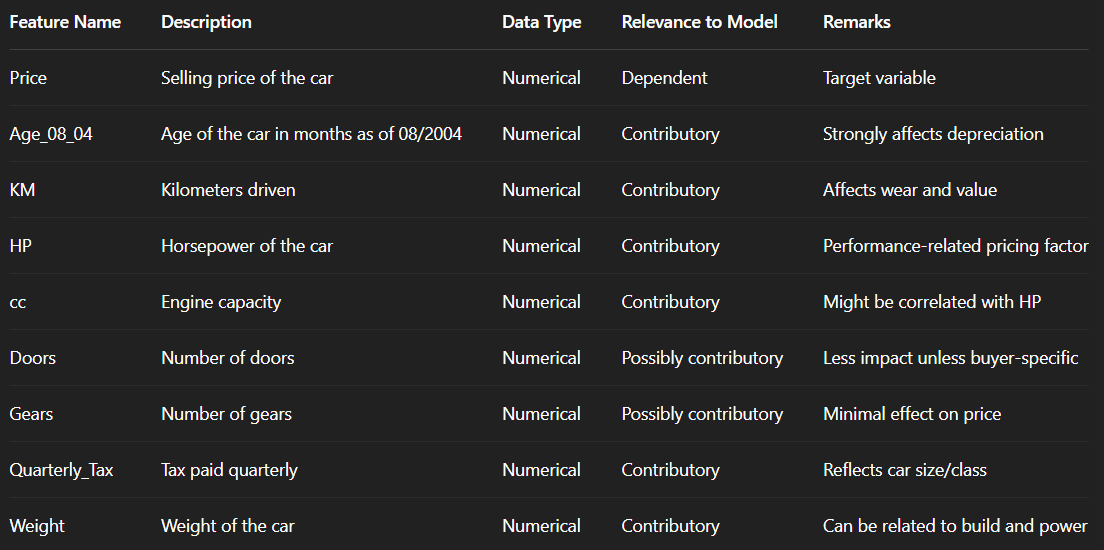

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
data = pd.read_csv("Computer_Data.csv")
data.head()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
0,1,1499,25,80,4,14,no,no,yes,94,1
1,2,1795,33,85,2,14,no,no,yes,94,1
2,3,1595,25,170,4,15,no,no,yes,94,1
3,4,1849,25,170,8,14,no,no,no,94,1
4,5,3295,33,340,16,14,no,no,yes,94,1


In [32]:
data.shape

(6259, 11)

## 3. Data preprocessing

In [33]:
data.dtypes

Unnamed: 0     int64
price          int64
speed          int64
hd             int64
ram            int64
screen         int64
cd            object
multi         object
premium       object
ads            int64
trend          int64
dtype: object

In [34]:
data.isna().sum()

Unnamed: 0    0
price         0
speed         0
hd            0
ram           0
screen        0
cd            0
multi         0
premium       0
ads           0
trend         0
dtype: int64

In [35]:
#Convert categorical variables to numerical
data['cd'] = data['cd'].map({'yes': 1, 'no': 0})
data['multi'] = data['multi'].map({'yes': 1, 'no': 0})
data['premium'] = data['premium'].map({'yes': 1, 'no': 0})


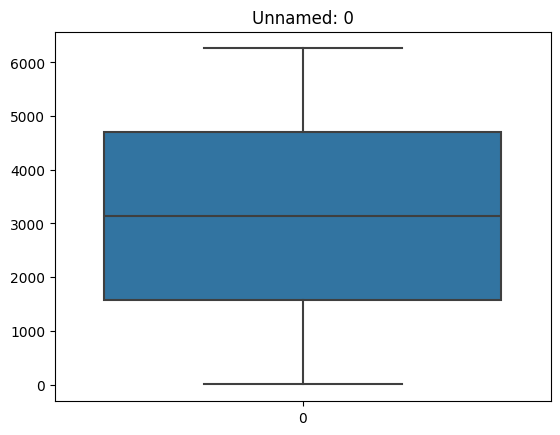

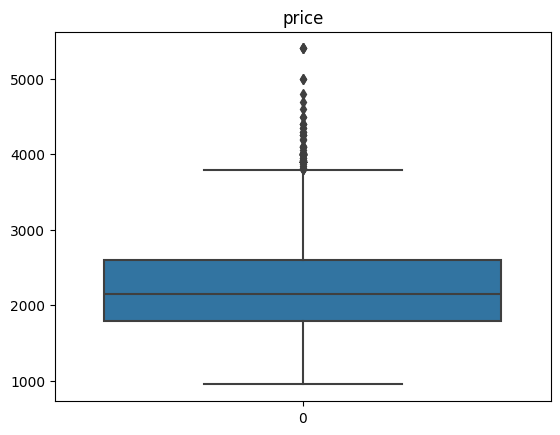

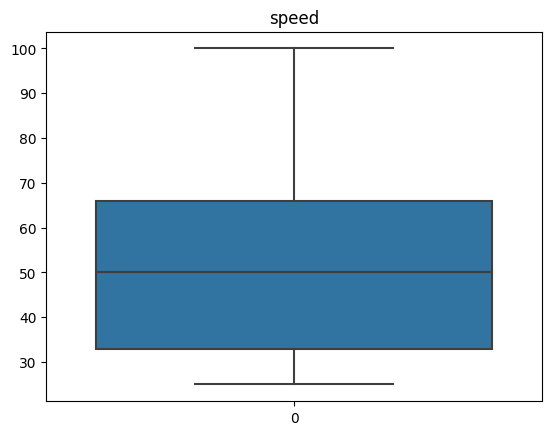

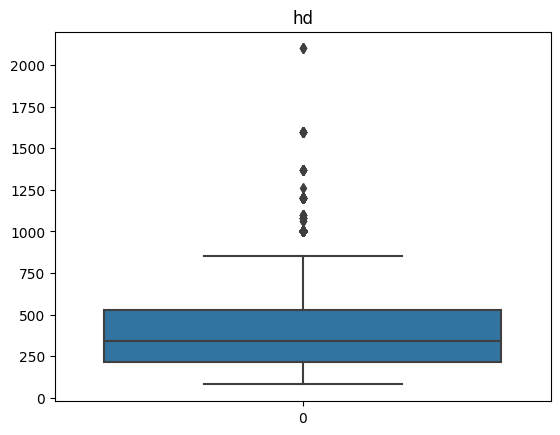

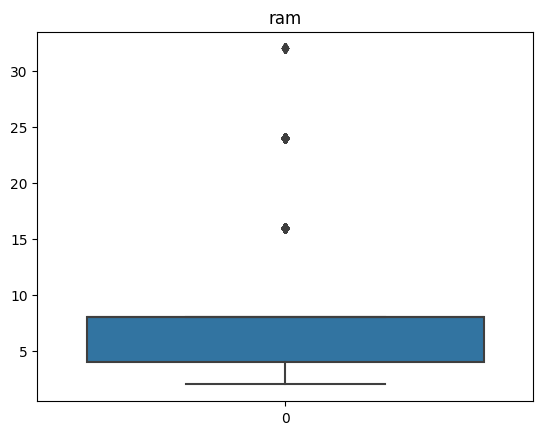

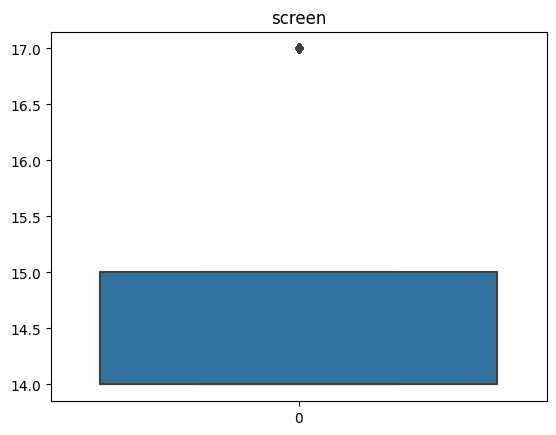

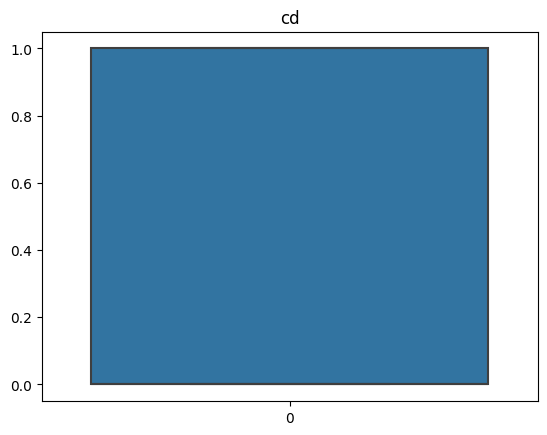

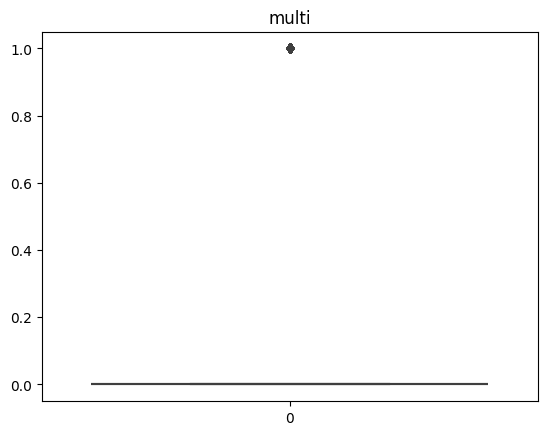

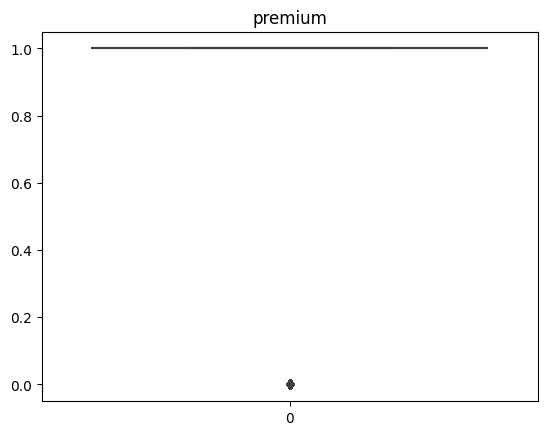

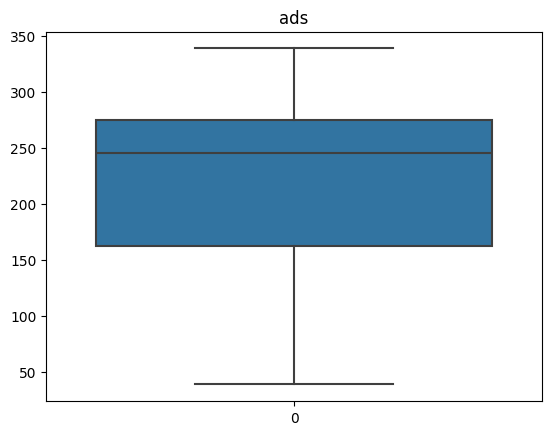

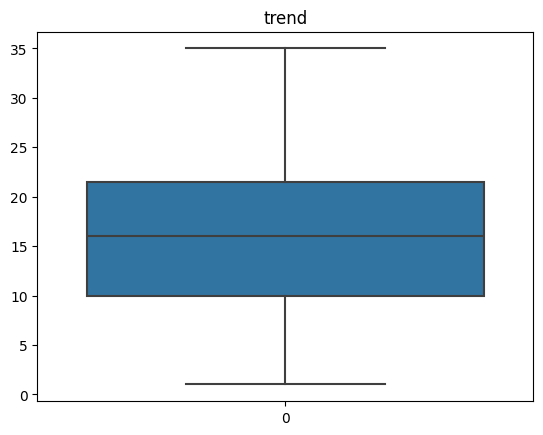

In [37]:
#outlier detection
for i in data.columns:
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [38]:
import pandas as pd

def remove_outliers_iqr(data):
    #Select only numeric columns
    numeric_cols = data.select_dtypes(include=['number'])
    #Compute Q1, Q3, and IQR
    Q1 = numeric_cols.quantile(0.25)
    Q3 = numeric_cols.quantile(0.75)
    IQR = Q3 - Q1
    #Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    #Create a mask for non-outliers
    mask = (numeric_cols >= lower_bound) & (numeric_cols <= upper_bound)
    #Keep only rows where all numeric columns are within bounds
    data_cleaned = data[mask.all(axis=1)]
    
    return data_cleaned
#Apply the function
data_cleaned = remove_outliers_iqr(data)
print("Original dataset shape:", data.shape)
print("New dataset shape after removing outliers:", data_cleaned.shape)


Original dataset shape: (6259, 11)
New dataset shape after removing outliers: (3257, 11)


In [39]:
data_cleaned.describe()

,Unnamed: 0,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
count,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.000000,3257.0,3257.0,3257.000000,3257.000000
mean,2716.511821,1964.440897,49.763279,314.063862,5.600246,14.299355,0.290144,0.0,1.0,222.871968,14.129874
std,1807.420881,445.601244,20.254117,155.183806,2.273358,0.458046,0.453898,0.0,0.0,74.705079,7.741526
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,0.000000,0.0,1.0,39.000000,1.000000
25%,1081.000000,1635.000000,33.000000,212.000000,4.000000,14.000000,0.000000,0.0,1.0,163.000000,8.000000
50%,2573.000000,1920.000000,50.000000,250.000000,4.000000,14.000000,0.000000,0.0,1.0,248.000000,14.000000
75%,4239.000000,2244.000000,66.000000,426.000000,8.000000,15.000000,1.000000,0.0,1.0,283.000000,19.000000
max,6255.000000,3795.000000,100.000000,850.000000,8.000000,15.000000,1.000000,0.0,1.0,339.000000,35.000000


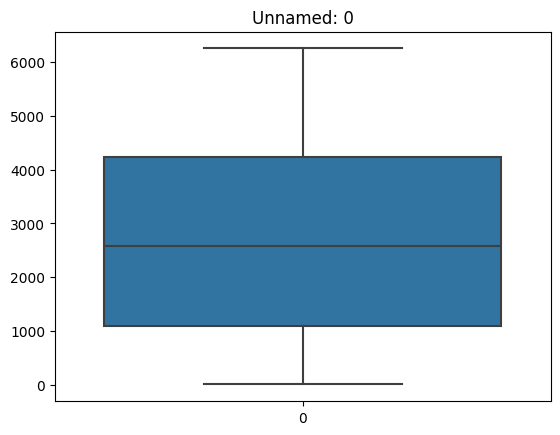

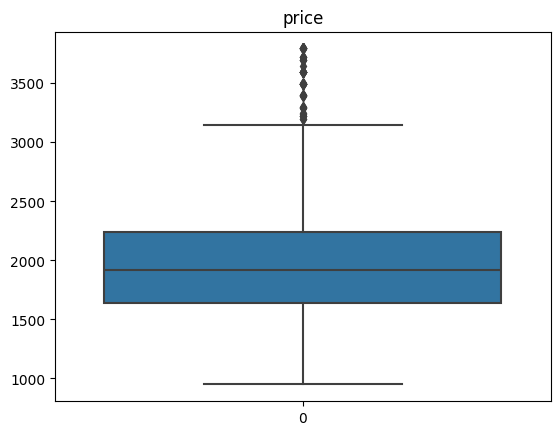

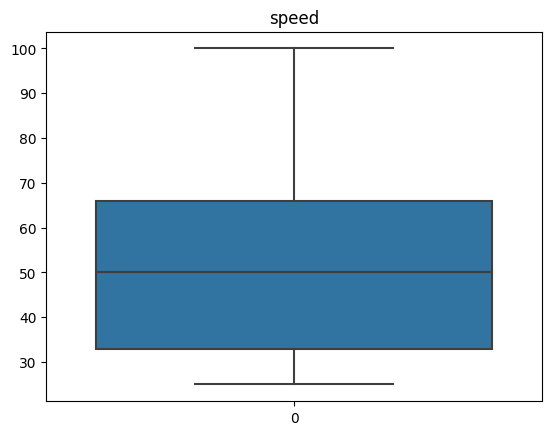

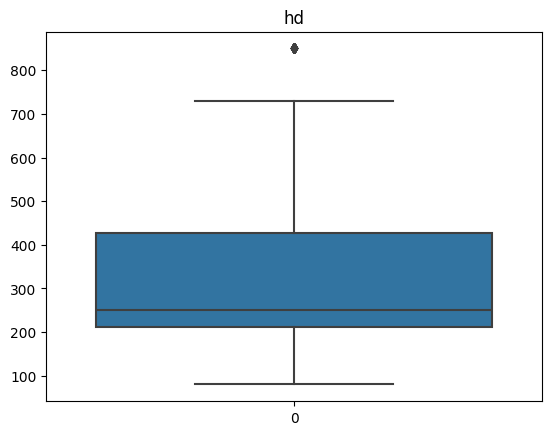

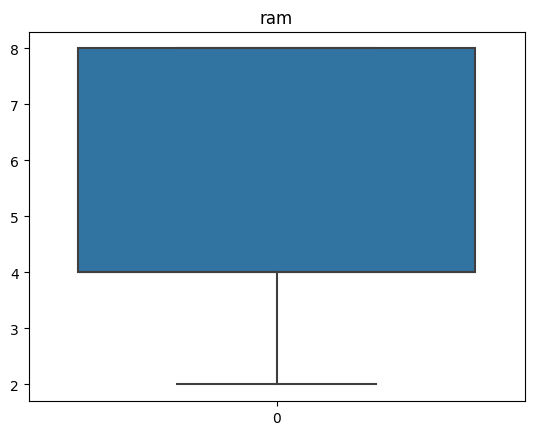

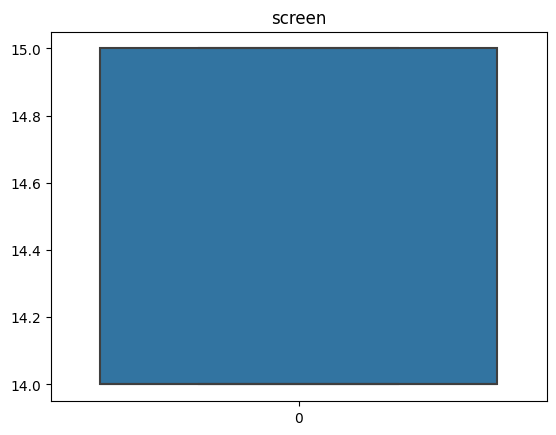

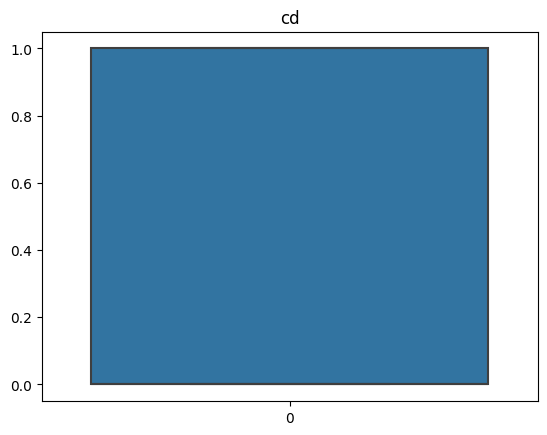

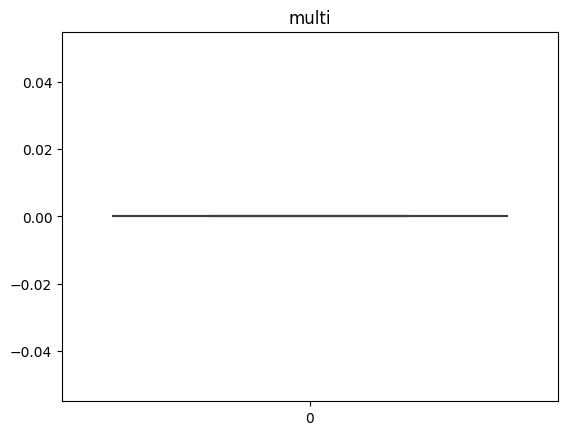

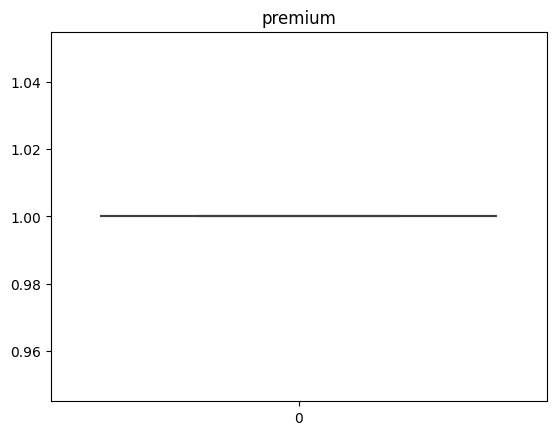

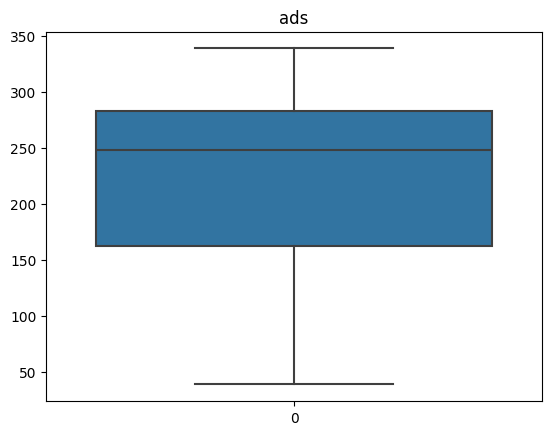

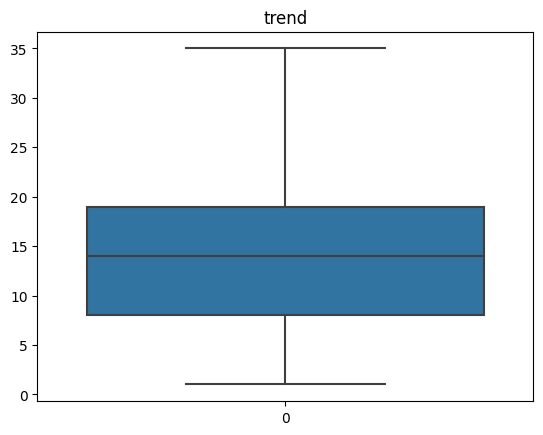

In [40]:
#outlier detection
for i in data.columns:
    sns.boxplot(data_cleaned[i])
    plt.title(i)
    plt.show()

## 4.EDA

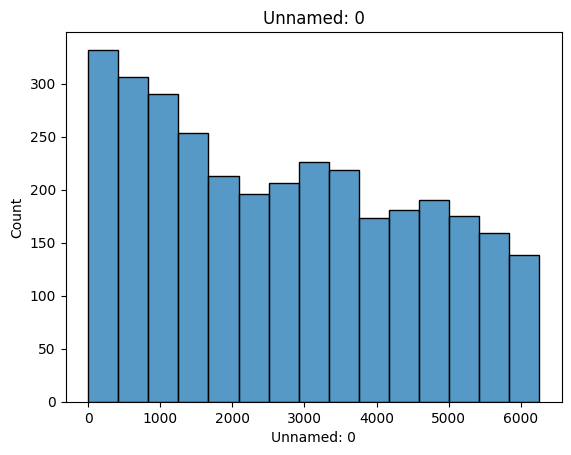

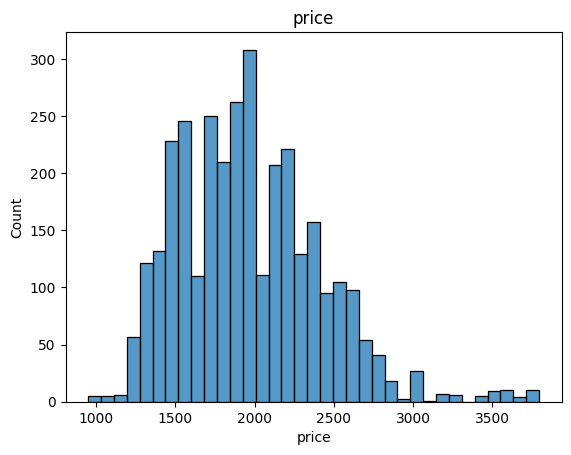

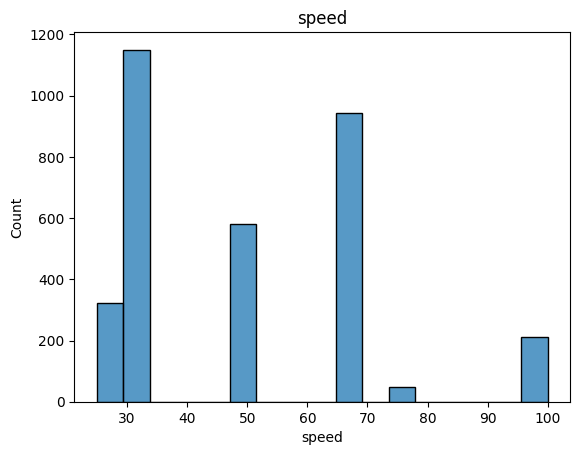

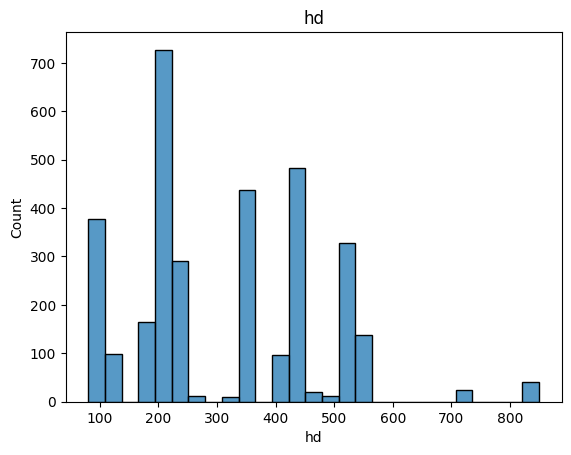

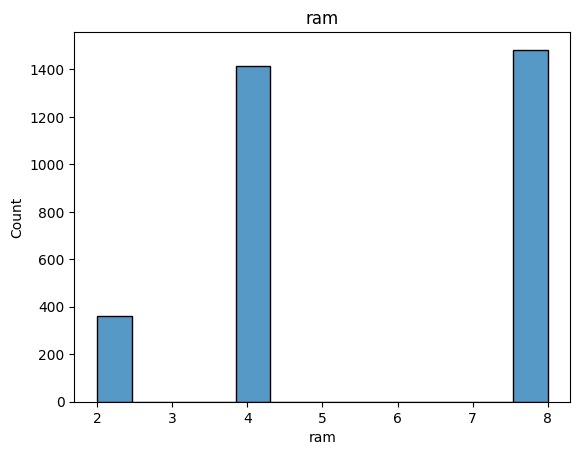

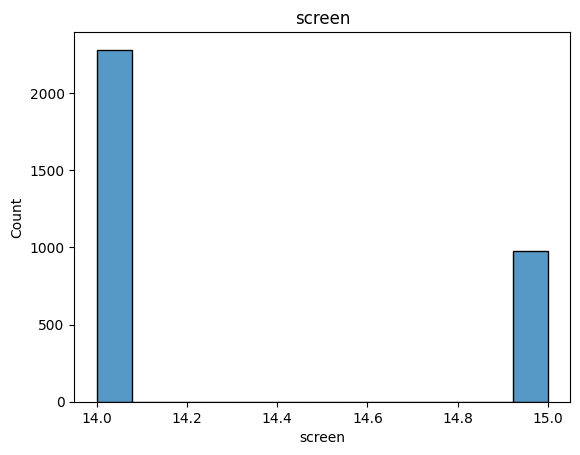

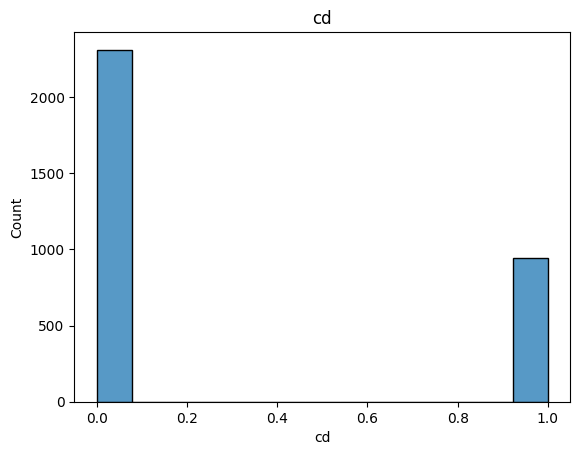

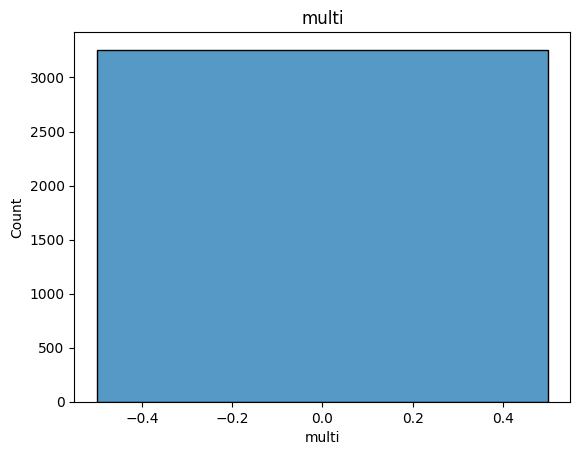

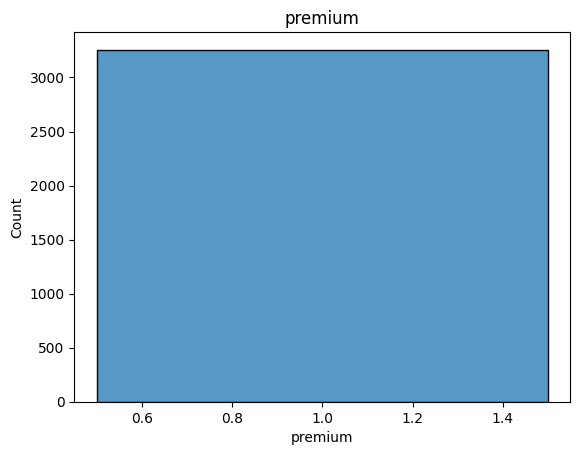

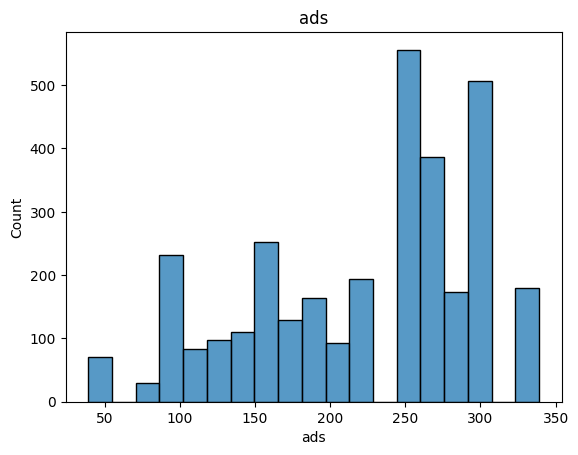

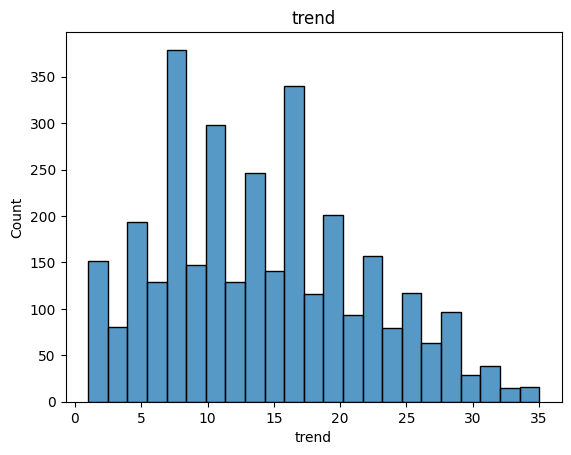

In [46]:
#Univariate analysis
for i in data.columns:
    sns.histplot(data[i])
    plt.title(i)
    plt.show()

In [41]:
data=data_cleaned

c:\Users\gaikw\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


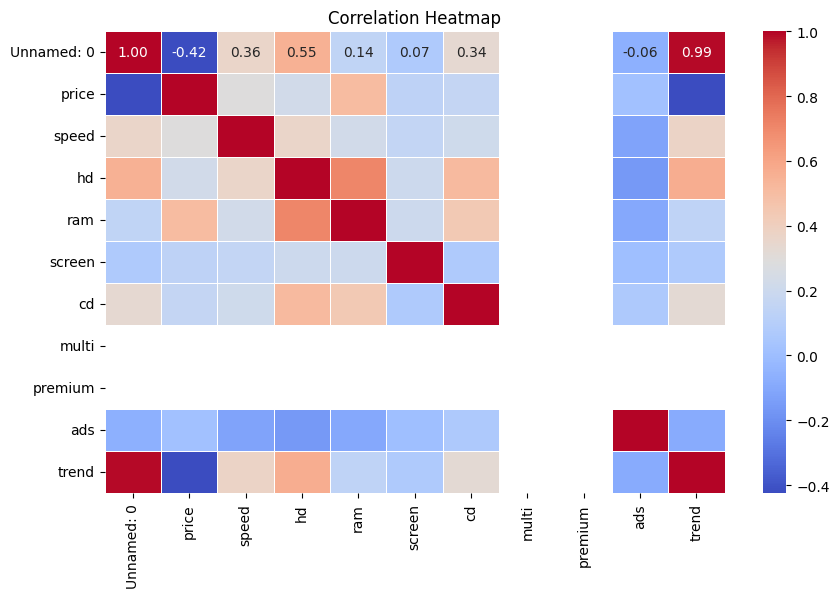

In [42]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

## 5. Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [13]:
#Define numerical features and target
numerical_cols = ["speed", "hd", "ram", "screen", "ads", "trend", "cd", "multi", "premium"]
target_col = "price"

In [14]:
#Define features (X) and target (y)
X = data[numerical_cols]
y = data[target_col]

In [15]:
#Split data into Train & Test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#Scale numerical features (Avoid modifying X_train/X_test directly)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [17]:
#Build Multilinear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [18]:
#Predict on test data
y_pred = model.predict(X_test_scaled)


In [19]:
#Model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 1960.2195777351249
Coefficients: [ 184.30962276  125.46378904  142.91685966    3.11398313   30.90208115
 -346.38946521   12.10965787    0.            0.        ]


In [20]:
#Check for Multicollinearity (VIF)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data)



Variance Inflation Factor (VIF):
    Feature          VIF
0    speed     1.232872
1       hd     3.815419
2      ram     2.568021
3   screen     1.065371
4      ads     1.069162
5    trend     1.942953
6       cd     1.450037
7    multi          NaN
8  premium  1006.701314


c:\Users\gaikw\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


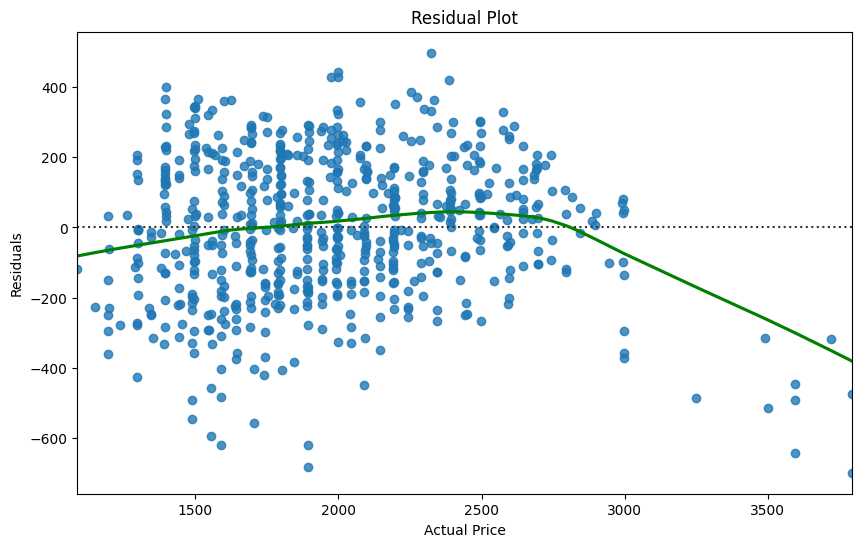

In [21]:
#Diagnostic Plots
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred, lowess=True, line_kws={"color": "green"})
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [22]:
#Evaluate Model Performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared Score: {r2:.4f}")


Root Mean Squared Error (RMSE): 256.29
R-Squared Score: 0.6870


In [23]:
#Model Tuning (Regularization)
#Ridge Regression (L2 Regularization)
ridge = Ridge(alpha=1)
ridge.fit(X_train_scaled, y_train)
y_ridge_pred = ridge.predict(X_test_scaled)
ridge_rmse = np.sqrt(mean_squared_error(y_test, y_ridge_pred))


In [24]:
#Lasso Regression (L1 Regularization)
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_lasso_pred = lasso.predict(X_test_scaled)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_lasso_pred))


In [25]:
#Compare Models
print("\nModel Comparison:")
print(f"Linear Regression RMSE: {rmse:.2f}")
print(f"Ridge Regression RMSE: {ridge_rmse:.2f}")
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}")



Model Comparison:
Linear Regression RMSE: 256.29
Ridge Regression RMSE: 256.31
Lasso Regression RMSE: 256.32


In [26]:
#Ridge Tuning
from sklearn.model_selection import GridSearchCV

ridge_params = {"alpha": np.logspace(-3, 3, 50)}
ridge_cv = GridSearchCV(Ridge(), ridge_params, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X_train_scaled, y_train)
best_ridge = ridge_cv.best_estimator_
print(f"Best Ridge Alpha: {ridge_cv.best_params_['alpha']}")


Best Ridge Alpha: 3.5564803062231287


In [27]:
#Lasso Tuning
lasso_params = {"alpha": np.logspace(-3, 3, 50)}
lasso_cv = GridSearchCV(Lasso(), lasso_params, scoring="neg_mean_squared_error", cv=5)
lasso_cv.fit(X_train_scaled, y_train)
best_lasso = lasso_cv.best_estimator_
print(f"Best Lasso Alpha: {lasso_cv.best_params_['alpha']}")

print("Lasso Coefficients:", lasso.coef_)


Best Lasso Alpha: 0.49417133613238334
Lasso Coefficients: [ 184.18318706  125.17616114  143.03591833    3.0488114    30.78439959
 -346.08571339   12.04752632    0.            0.        ]


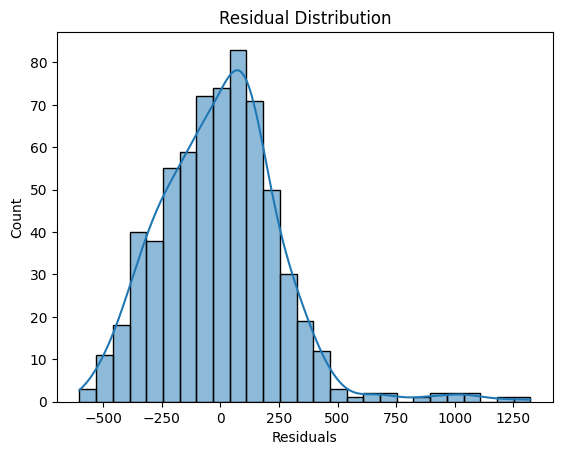

In [28]:
# Residual Distribution Plot
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution")
plt.show()


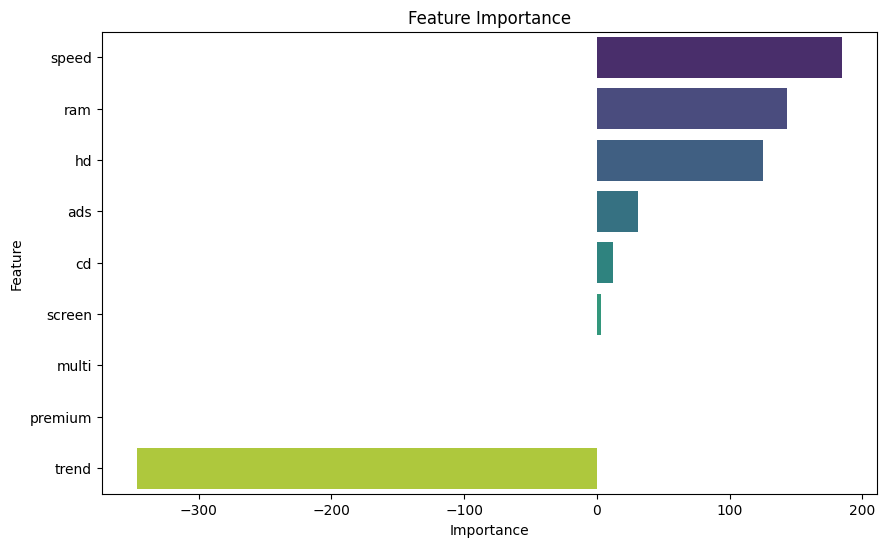


Feature Importance:
    Feature  Importance
0    speed  184.309623
2      ram  142.916860
1       hd  125.463789
4      ads   30.902081
6       cd   12.109658
3   screen    3.113983
7    multi    0.000000
8  premium    0.000000
5    trend -346.389465


In [29]:
#Feature Importance
feature_importance = pd.DataFrame({
    'Feature': numerical_cols,
    'Importance': model.coef_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

print("\nFeature Importance:\n", feature_importance)